In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm, ticker
import glob
import pandas as pd
from uncertainties import ufloat
import datetime as datetime

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

I made an automatic plot maker below, handles all the plots at once. Use that instead of single plot makers if redoing every plot

In [2]:
#Importing data from a CSV
#Right click on file, hold 'option', copy as Pathname ez pz
def CSVToDataframe(filepath, verbose=False):
    '''
    Just a really simple function to read in a csv
    '''
    Table=pd.read_csv(filepath)
    if verbose == True:
        print(filepath, 'read in')
    return(Table)

In [10]:
glob.glob('../../../../Downloads/2025UpdateOut.csv')

['../../../../Downloads\\2025UpdateOut.csv']

In [ ]:
#TODO LIST
    #Make easy to mask out whistlers by some criteria
        #Only magnetic, within a certian time range, within a certian altitude, ignore high latitudes
        #As some examples
    #Add functionality for a colorbar
    #Add functionality for datetimes
        #Time as a colorbar might make for something interesting idk
        
        
#Make a google slides
    #plots of everything of everythign basically
    #distance vs latitude
        #keep in mind our sampling, try and spot biases

Text(0, 0.5, 'dispersionConstant')

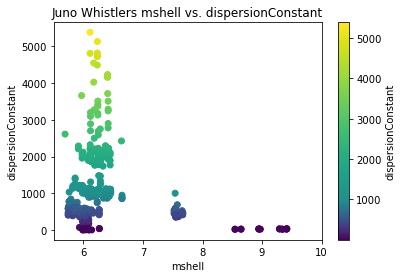

In [78]:
#Simple scatterplot making, give 2 variables to plot
filepath='Whistlers_AllDataIo.csv' #CSV File to read
XAxis='mshell'
YAxis='dispersionConstant'
colorbar = 'dispersionConstant'

Table=CSVToDataframe(filepath) #Read in the Table

#Masking Rules Here
# ModifiedTable=Table #No masking
ModifiedTable=Table.loc[Table['dispersionConstant'] >= 10] #prunes short dispersion whistlers out
ModifiedTable=Table.loc[Table['radius(RJ)'] >= 3]
#ModifiedTable=ModifiedTable.loc[ModifiedTable['mshell'] < 2] #prunes for mshell
#We can do a lot of masking here, like a geographic, time, or whistler type constraint. ShortD whistlers are just main issue

ModifiedTable=ModifiedTable.reset_index()

cmap = 'viridis'
plt.scatter(ModifiedTable[XAxis], ModifiedTable[YAxis], c = ModifiedTable[colorbar], cmap=cmap, norm=colors.TwoSlopeNorm(vcenter=1000))
plt.colorbar(label = colorbar)

plt.title('Juno Whistlers ' + XAxis + ' vs. ' + YAxis)
plt.xlabel(XAxis)
plt.xlim(5.5, 10)
plt.ylabel(YAxis)

Text(0, 0.5, 'dispersionConstant')

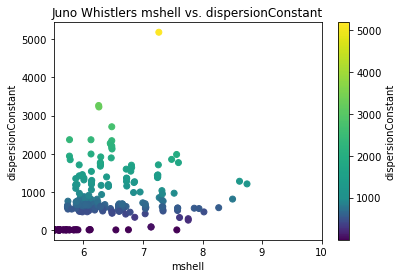

In [77]:
#Simple scatterplot making, give 2 variables to plot
filepath='Whistlers_AllDataIo.csv' #CSV File to read
XAxis='mshell'
YAxis='dispersionConstant'
colorbar = 'dispersionConstant'

Table=CSVToDataframe(filepath) #Read in the Table

#Masking Rules Here
# ModifiedTable=Table #No masking
ModifiedTable=Table.loc[Table['dispersionConstant'] >= 10] #prunes short dispersion whistlers out
ModifiedTable=Table.loc[Table['radius(RJ)'] <= 3]
#ModifiedTable=ModifiedTable.loc[ModifiedTable['mshell'] < 2] #prunes for mshell
#We can do a lot of masking here, like a geographic, time, or whistler type constraint. ShortD whistlers are just main issue

ModifiedTable=ModifiedTable.reset_index()

cmap = 'viridis'
plt.scatter(ModifiedTable[XAxis], ModifiedTable[YAxis], c = ModifiedTable[colorbar], cmap=cmap, norm=colors.TwoSlopeNorm(vcenter=1000))
plt.colorbar(label = colorbar)

plt.title('Juno Whistlers ' + XAxis + ' vs. ' + YAxis)
plt.xlabel(XAxis)
plt.xlim(5.5, 10)
plt.ylabel(YAxis)

In [38]:
ModifiedTable['dispersionConstant']

0       548.832
1       582.199
2      1225.284
3      1196.744
4      1744.769
5      1731.177
6       606.247
7       659.975
8       588.952
9       423.408
10     1389.546
11     1372.476
12      610.795
13      495.345
14     1850.302
15      963.097
16     1979.452
17      684.530
18      624.341
19      678.791
20      596.219
21      646.559
22      546.337
23      754.169
24     1936.928
25     1174.689
26     1090.678
27      587.662
28      731.479
29      553.136
30      753.773
31      592.129
32      769.353
33      785.953
34      679.601
35      744.024
36      623.250
37     2365.373
38      596.097
39      557.705
40      649.764
41      605.329
42      646.154
43      561.424
44      525.793
45      614.331
46     1264.368
47      848.086
48     1030.961
49      946.061
50      879.486
51     1108.805
52     1092.801
53     1770.594
54     1892.217
55      919.179
56      987.369
57     2055.111
58     1916.157
59     2781.819
60     2899.807
61     3717.408
62     4

Burst:
    mean: 290.3864107997264
    standard deviation: 693.7922044954794
    minimum: 0.146
    maximum: 5387.742
 
Survey:
    mean: 1056.2183529411764
    standard deviation: 742.7790730563711
    minimum: 214.771
    maximum: 5135.019


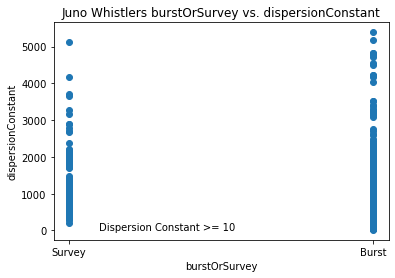

In [60]:
#Comparing between lists of 2

filepath='Whistlers_AllDataIo.csv' #CSV File to read
XAxis='burstOrSurvey'
YAxis='dispersionConstant'

Table=CSVToDataframe(filepath) #Read in the Table

#Masking Rules Here
ModifiedTable=Table.loc[Table['dispersionConstant'] >= 10] #prunes short dispersion whistlers out
#ModifiedTable=Table.loc[Table['mshell'] <= 20] #prunes short dispersion whistlers out
#We can do a lot of masking here, like a geographic, time, or whistler type constraint. ShortD whistlers are just main issue

ModifiedTable=ModifiedTable.reset_index()

plt.figure(1)
plt.scatter(ModifiedTable[XAxis], ModifiedTable[YAxis])
#plt.yscale('log')
plt.title('Juno Whistlers ' + XAxis + ' vs. ' + YAxis)
plt.xlabel(XAxis)
plt.ylabel(YAxis)
plt.text(.1, .2, "Dispersion Constant >= 10")
#plt.savefig(str('Juno Whistlers ' + XAxis + ' vs. ' + YAxis + '.png'), format = 'png')
#Some Statistics
    #mean, std, min, max
print('Burst:')
ModifiedTable=Table.loc[Table['burstOrSurvey'] == 'Burst']
print('    mean: '+str(np.mean(ModifiedTable['dispersionConstant'])))
print('    standard deviation: '+str(np.std(ModifiedTable['dispersionConstant'])))
print('    minimum: '+str(np.min(ModifiedTable['dispersionConstant'])))
print('    maximum: '+str(np.max(ModifiedTable['dispersionConstant'])))
print(' ')
print('Survey:')
ModifiedTable=Table.loc[Table['burstOrSurvey'] == 'Survey']
print('    mean: '+str(np.mean(ModifiedTable['dispersionConstant'])))
print('    standard deviation: '+str(np.std(ModifiedTable['dispersionConstant'])))
print('    minimum: '+str(np.min(ModifiedTable['dispersionConstant'])))
print('    maximum: '+str(np.max(ModifiedTable['dispersionConstant'])))

(-90.0, 90.0)

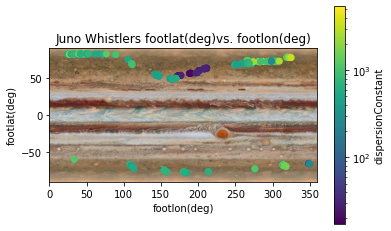

In [70]:
#mapping

filepath='Whistlers_AllDataIo.csv' #CSV File to read
latitude = 'footlat(deg)'
longitude = 'footlon(deg)'
colorbar = 'dispersionConstant'

Table=CSVToDataframe(filepath) #Read in the Table

#Masking Rules Here
#ModifiedTable=Table #No Masking
ModifiedTable=Table.loc[Table['dispersionConstant'] >= 10] #prunes short dispersion whistlers out
#ModifiedTable=Table.loc[Table['mshell'] <= 20] #prunes short dispersion whistlers out
#We can do a lot of masking here, like a geographic, time, or whistler type constraint. ShortD whistlers are just main issue

ModifiedTable=ModifiedTable.reset_index()

plt.figure(1)
plt.imshow(plt.imread('jupitermap.jpg'), extent=[0, 360, -90, 90])
plt.scatter(ModifiedTable[longitude], ModifiedTable[latitude], c=ModifiedTable[colorbar], norm=colors.LogNorm())
plt.colorbar(label="dispersionConstant")
plt.title('Juno Whistlers ' + latitude + 'vs. ' + longitude)
plt.xlabel(longitude)
plt.ylabel(latitude)
#plt.text(180, 0, "Dispersion Constant >= 10")
plt.xlim(0, 360)
plt.ylim(-90, 90)
#plt.savefig(str('Juno Whistlers ' + longitude + ' vs. ' + latitude + '2.png'), format = 'png')

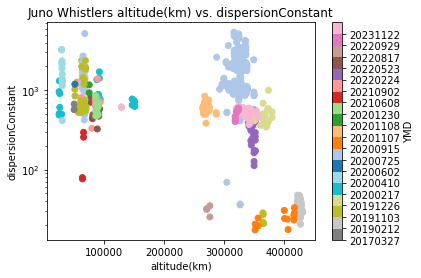

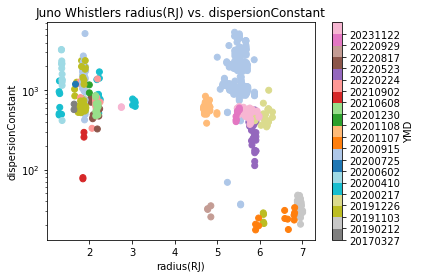

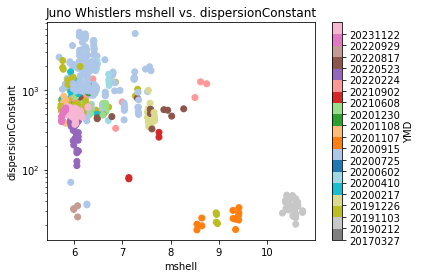

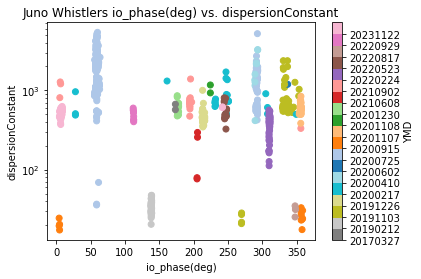

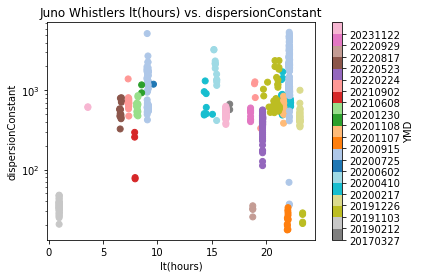

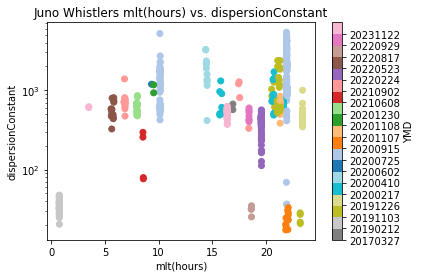

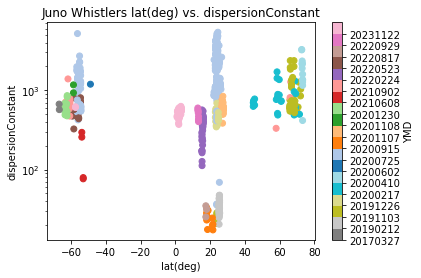

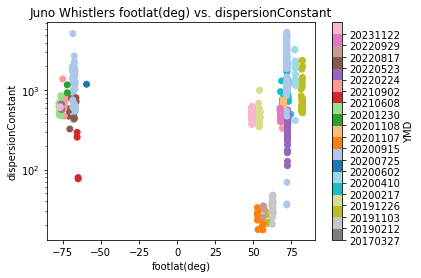

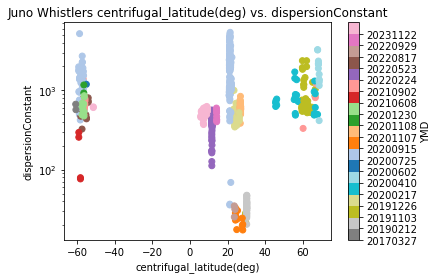

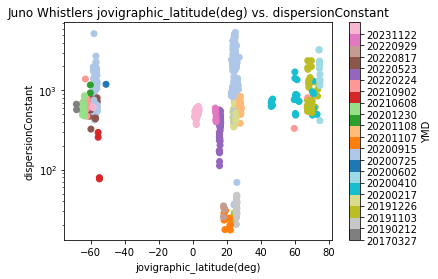

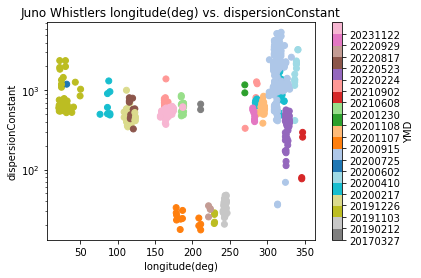

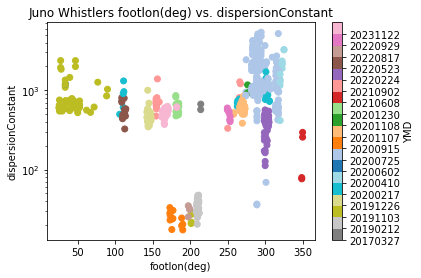

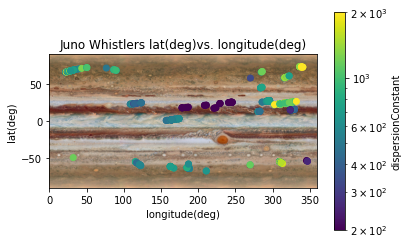

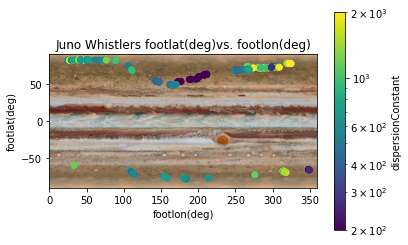

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

#Importing data from a CSV
#Right click on file, hold 'option', copy as Pathname ez pz
def CSVToDataframe(filepath, verbose=False):
    '''
    Just a really simple function to read in a csv
    '''
    Table=pd.read_csv(filepath)
    if verbose == True:
        print(filepath, 'read in')
    return(Table)

#lets try to automatically make all the needed plots at once
filepath='Whistlers_AllDataIo.csv' #CSV File to read
Table=CSVToDataframe(filepath)

#For Jeremy: Masking rules shouldn't be something you need to worry about, just assume the CSV fed in is everything you want to plot

#Masking Rules Here
#ModifiedTable=Table #No masking
ModifiedTable=Table.loc[Table['dispersionConstant'] >= 10] #prunes short dispersion whistlers out
#ModifiedTable=ModifiedTable.loc[ModifiedTable['mshell'] < 2] #prunes for mshell
#We can do a lot of masking here, like a geographic, time, or whistler type constraint. ShortD whistlers are just main issue
ModifiedTable=ModifiedTable.reset_index()

#This just sets up all the plots I make, X and Y Axis information
#RegularPlots assumes a Z Axis of YMD
RegularPlots = [['altitude(km)', 'dispersionConstant'], 
                ['radius(RJ)', 'dispersionConstant'], 
                ['mshell', 'dispersionConstant'],
                ['io_phase(deg)', 'dispersionConstant'],
                ['lt(hours)', 'dispersionConstant'],
                ['mlt(hours)', 'dispersionConstant'],
                ['lat(deg)', 'dispersionConstant'],
                ['footlat(deg)', 'dispersionConstant'],
                ['centrifugal_latitude(deg)', 'dispersionConstant'],
                ['jovigraphic_latitude(deg)', 'dispersionConstant'],
                ['longitude(deg)', 'dispersionConstant'],
                ['footlon(deg)', 'dispersionConstant']
               ]
#MapplingPlots assumes a Z Axis of dispersionConstant
MappingPlots = [['lat(deg)', 'longitude(deg)'],
               ['footlat(deg)', 'footlon(deg)']]

#Loop over RegularPlots, plot according to those axis
for i in range(len(RegularPlots)):
    #Simple scatterplot making, give 2 variables to plot
    XAxis=RegularPlots[i][0]
    YAxis=RegularPlots[i][1]
    colorbar = 'YMD'
    plt.figure(i)
    
    #Colorbar shenanigans
    #All this really does is take every unique YMD, assign it an index value, and color based on the index
    #There's some other stuff that just handles some personal aesthetics
    
    cmap = plt.get_cmap('tab20', len(np.unique(ModifiedTable[colorbar]))) #Setup a colormap, 1 color per unique YMD
    #matplotlib's tab20 is a qualitative colormap, see https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative
    #pretty sure all it means is that it is discrete
    Testcolors = cmap(np.linspace(0, 1, cmap.N))
    shifted_colors = np.roll(Testcolors, 6, axis=0)
    cmap = colors.ListedColormap(shifted_colors)
    #I don't want that brown color to be the middle I want more blue
    norm = colors.BoundaryNorm(np.arange(-0.5, len(np.unique(ModifiedTable[colorbar]))+0.5), cmap.N) #This discritizes it(Not Continuous)
    #Since the above also makes it so we map numbers 1:len(uniqueYMD), we need to map each YMD to an index value
    cindex=[]
    for i in range(len(ModifiedTable[colorbar])):
        cindex.append(np.where(np.unique(ModifiedTable[colorbar]) == ModifiedTable[colorbar][i]))


    plt.scatter(ModifiedTable[XAxis], ModifiedTable[YAxis], c=cindex, cmap=cmap, norm=norm)
    plt.yscale('log')
    cbar = plt.colorbar(label=colorbar, ticks=np.arange(-0.5, len(np.unique(ModifiedTable[colorbar]))+0.5) - 1)
    cbar.ax.set_yticklabels(np.unique(ModifiedTable[colorbar]))
    plt.title('Juno Whistlers ' + XAxis + ' vs. ' + YAxis)
    plt.xlabel(XAxis)
    plt.ylabel(YAxis)
    plt.show()
    #plt.savefig(str('NewBatch' + XAxis + ' vs' + YAxis + '.png'), format = 'png')
    
#And this one makes the Jupiter Maps
for i in range(len(MappingPlots)):
    latitude = MappingPlots[i][0]
    longitude = MappingPlots[i][1]
    colorbar = 'dispersionConstant'

    plt.figure(i+len(RegularPlots))
    #This puts the jupiter map in the background
    plt.imshow(plt.imread('jupitermap.jpg'), extent=[0, 360, -90, 90])
    plt.scatter(ModifiedTable[longitude], ModifiedTable[latitude], c=ModifiedTable[colorbar], norm=colors.LogNorm())
    plt.colorbar(label="dispersionConstant")
    plt.clim(200, 2000)
    plt.title('Juno Whistlers ' + latitude + 'vs. ' + longitude)
    plt.xlabel(longitude)
    plt.ylabel(latitude)
    plt.xlim(0, 360)
    plt.ylim(-90, 90)
    plt.show()
    #plt.savefig(str('Juno Whistlers ' + longitude + ' vs. ' + latitude + '2.png'), format = 'png')

    






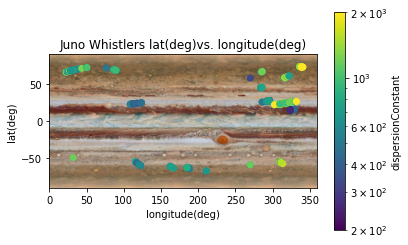

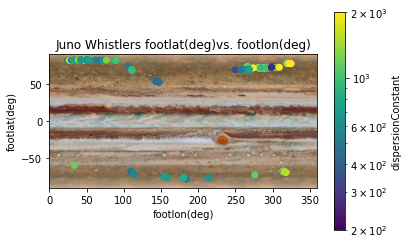

In [20]:
#mapping



In [9]:
#Readouts for some outliers. Lots of masking and a printout at the end
filepath='Whistlers_AllDataIo.csv' #CSV File to read

Table=CSVToDataframe(filepath) #Read in the Table

#Masking Rules Here
ModifiedTable=Table
ModifiedTable=ModifiedTable.loc[ModifiedTable['dispersionConstant'] >= 10] #prunes short dispersion whistlers out
# ModifiedTable=ModifiedTable.loc[ModifiedTable['dispersionConstant'] <= 150] #cap long dispersion whistlers
# ModifiedTable=ModifiedTable.loc[ModifiedTable['mshell'] <= 11] #prunes for mshell
ModifiedTable=ModifiedTable.loc[ModifiedTable['mshell'] >= 8] #prunes for mshell
#We can do a lot of masking here, like a geographic, time, or whistler type constraint. ShortD whistlers are just main issue

ModifiedTable=ModifiedTable.reset_index()
print('idnum, dispersionConstant, YMD, startHMS, burstOrSurvey,  electricOrMagnetic')
for i in range(len(ModifiedTable['idnum'])):
    print(str(ModifiedTable['idnum'][i]) + ',',
          str(ModifiedTable['dispersionConstant'][i]) + ',',
          str(ModifiedTable['YMD'][i]) + ',', 
          str(ModifiedTable['startHMS'][i]) + ',', 
          str(ModifiedTable['burstOrSurvey'][i]) + ',', 
          str(ModifiedTable['electricOrMagnetic'][i]))

idnum, dispersionConstant, YMD, startHMS, burstOrSurvey,  electricOrMagnetic
76, 808.924, 20210902, 215742.91, Survey, Electric
77, 1276.814, 20210902, 215813.15, Survey, Electric
78, 1207.197, 20210902, 215845.12, Survey, Electric
123, 472.267, 20220523, 31901.34, Survey, Magnetic
124, 583.37, 20220523, 31949.73, Survey, Magnetic
1030, 20.892, 20191103, 180758.0, Burst, Electric
1031, 27.219, 20191103, 180828.0, Burst, Electric
1032, 21.735, 20191103, 180838.0, Burst, Electric
1033, 28.455, 20191103, 180847.0, Burst, Electric
1034, 28.827, 20190212, 123134.0, Burst, Electric
1034, 30.21, 20190212, 123134.0, Burst, Magnetic
1035, 32.509, 20190212, 123529.0, Burst, Electric
1035, 25.666, 20190212, 123529.0, Burst, Magnetic
1036, 34.356, 20190212, 123532.0, Burst, Electric
1037, 43.652, 20190212, 123539.0, Burst, Electric
1038, 26.435, 20190212, 123542.0, Burst, Electric
1039, 47.129, 20190212, 123551.0, Burst, Electric
1040, 32.649, 20190212, 123606.0, Burst, Electric
1041, 32.843, 2019

In [20]:
ModifiedTable.loc[ModifiedTable['YMD'] == 20200725].loc[ModifiedTable['dispersionConstant'] >= 10].loc[ModifiedTable['startHMS']>60000].loc[ModifiedTable['burstOrSurvey'] == 'Burst'].sort_values('startHMS')

,index,YMD,startHMS,startSSM(s),stopSSM(s),idnum,dispersionConstant,burstOrSurvey,electricOrMagnetic,altitude(km),radius(RJ),mshell,mlat(deg),lat(deg),jovigraphic_latitude(deg),centrifugal_latitude(deg),mlt(hours),lt(hours),io_phase(deg),longitude(deg),footlat(deg),footlon(deg)
393,1480,20200725,70228.03,25348.03,25353.22,920,570.435,Burst,Magnetic,62579,1.8318,6.0582,-57.210,-54.418,-56.3126,-56.3945,10.1498,9.17,290.808,309.312,-66.888,313.665
392,1479,20200725,70228.03,25348.03,25353.22,920,545.448,Burst,Electric,62579,1.8318,6.0582,-57.210,-54.418,-56.3126,-56.3945,10.1498,9.17,290.808,309.312,-66.888,313.665
207,207,20200725,70232.35,25352.35,25358.40,140,612.433,Burst,Electric,62719,1.8337,6.0900,-57.286,-54.480,-56.3704,-56.4665,10.1482,9.17,290.872,309.407,-66.937,313.769
403,1490,20200725,70232.35,25352.35,25358.40,926,622.611,Burst,Magnetic,62719,1.8337,6.0900,-57.286,-54.480,-56.3704,-56.4665,10.1482,9.17,290.872,309.407,-66.937,313.769
402,1489,20200725,70232.35,25352.35,25358.40,926,642.664,Burst,Electric,62719,1.8337,6.0900,-57.286,-54.480,-56.3704,-56.4665,10.1482,9.17,290.872,309.407,-66.937,313.769
208,208,20200725,70232.35,25352.35,25358.40,140,611.238,Burst,Magnetic,62719,1.8337,6.0900,-57.286,-54.480,-56.3704,-56.4665,10.1482,9.17,290.872,309.407,-66.937,313.769
215,215,20200725,70238.40,25358.40,25367.04,144,1299.253,Burst,Electric,62937,1.8367,6.1392,-57.404,-54.575,-56.4598,-56.5779,10.1458,9.17,290.970,309.554,-67.012,313.929
216,216,20200725,70238.40,25358.40,25365.31,144,1269.295,Burst,Magnetic,62912,1.8363,6.1334,-57.390,-54.564,-56.4492,-56.5648,10.1460,9.17,290.958,309.537,-67.003,313.910
404,1491,20200725,70238.40,25358.40,25365.31,927,1535.468,Burst,Electric,62912,1.8363,6.1334,-57.390,-54.564,-56.4492,-56.5648,10.1460,9.17,290.958,309.537,-67.003,313.910
405,1492,20200725,70238.40,25358.40,25365.31,927,1053.251,Burst,Magnetic,62912,1.8363,6.1334,-57.390,-54.564,-56.4492,-56.5648,10.1460,9.17,290.958,309.537,-67.003,313.910


In [28]:
ModifiedTable.loc[ModifiedTable['footlat(deg)'] >= 10]

,index,YMD,startHMS,startSSM(s),stopSSM(s),idnum,dispersionConstant,burstOrSurvey,electricOrMagnetic,altitude(km),...,mlat(deg),lat(deg),jovigraphic_latitude(deg),centrifugal_latitude(deg),mlt(hours),lt(hours),io_phase(deg),longitude(deg),footlat(deg),footlon(deg)
577,1664,20220224,215950.0,79190.0,79190.0,1029,171.151,Burst,Electric,351417,...,8.82,15.207,15.525,11.6067,19.56,19.66,324.0,72.412,298.605,NaN
578,1665,20220224,215950.0,79190.0,79190.0,1029,260.521,Burst,Magnetic,351417,...,8.82,15.207,15.525,11.6067,19.56,19.66,324.0,72.412,298.605,NaN


In [23]:
len(np.unique(ModifiedTable['idnum']))

345

(0.0, 10.0)

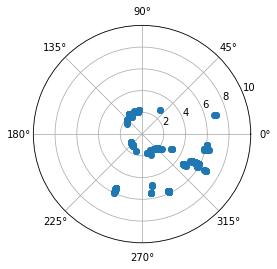

In [36]:
filepath='Whistlers_AllDataIo.csv' #CSV File to read

Table=CSVToDataframe(filepath) #Read in the Table
ModifiedTable=Table
ModifiedTable=ModifiedTable.loc[ModifiedTable['dispersionConstant'] >= 10] #prunes short dispersion whistlers out

plt.polar(ModifiedTable['lt(hours)']*(2*np.pi/24), ModifiedTable['radius(RJ)'], 'o')
#plt.polar(np.array([0, 3, 6, 9, 12, 15, 18, 21, 24])*(2*np.pi/24), [9, 9, 9, 9, 9, 9, 9, 9, 9], 'o', color = 'orange')
plt.ylim(0, 10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

In [7]:
pd.__version__

'1.2.4'